In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove840b300d-for-pre-train/glove.840B.300d.pkl
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Import library

In [4]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re
import operator

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.naive_bayes import GaussianNB
#!pip install sentencepiece
import sentencepiece
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Loading pytorch packages.

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#Another
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.0/12.0 MB 69.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011737 sha256=fea9400cab65131fa44dbddaf0e197b0f09936719f935c7584a2b6359e8973d4
  Stored in directory: /root/.cache/pip/wheels/28/45/a9/c35b2107f053046bd5ac0b1adb5ea970938b02b134e49b9a06
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0


/opt/conda/lib/python3.10/site-packages/spacy/util.py:895: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.5.3,<3.6.0
  warnings.warn(warn_msg)


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.9/5.9 MB 40.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  √ó Getting requirements to build wheel did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [49 lines of output]
      Traceback (most recent call last):
        File "/tmp/pip-build-env-cgnsxrb0/overlay/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/tmp/pip-build-env-cgnsxrb0/overlay/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/tmp/pip-build-env-cgnsxrb0/overlay/lib/python3.10/site-packages/setuptools/_vendor/packaging/_pa

# Loading data

In [5]:
# Loading the train and test data for visualization & exploration.

train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
print('Shape of training set: ', train_df.shape)
print('Shape of testing set: ', test_df.shape)

Shape of training set:  (7613, 5)
Shape of testing set:  (3263, 4)


# Preprocessing and Cleaning

## Missing value in train and test dataset

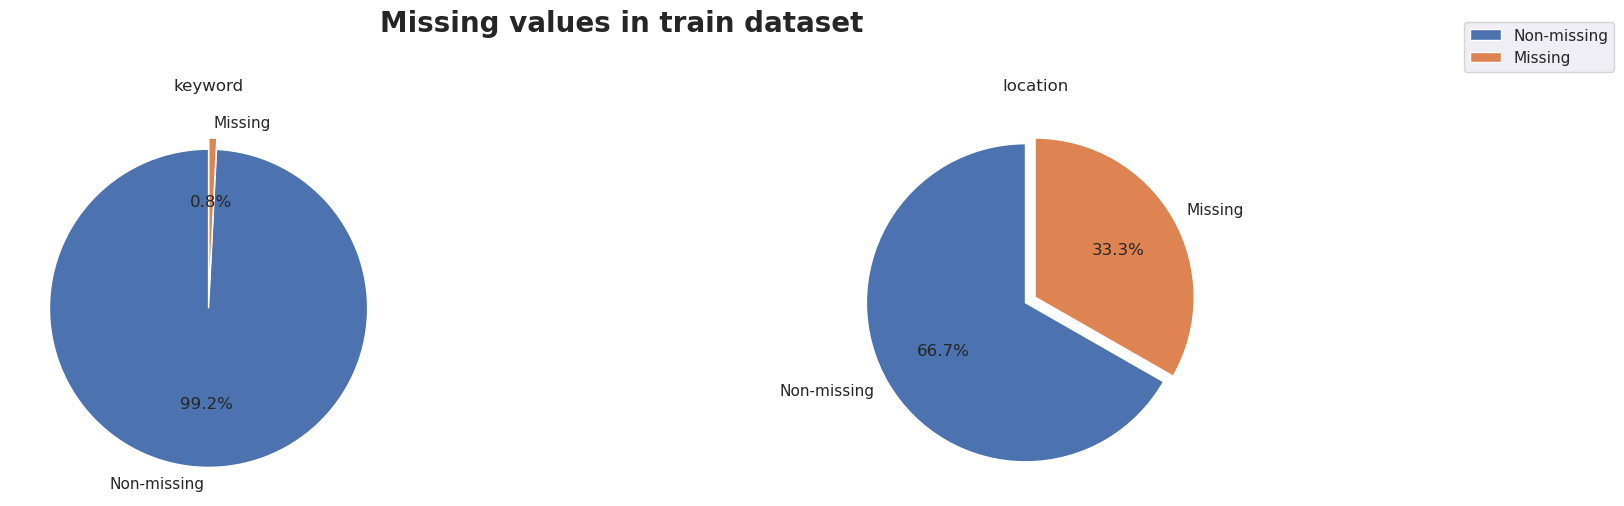

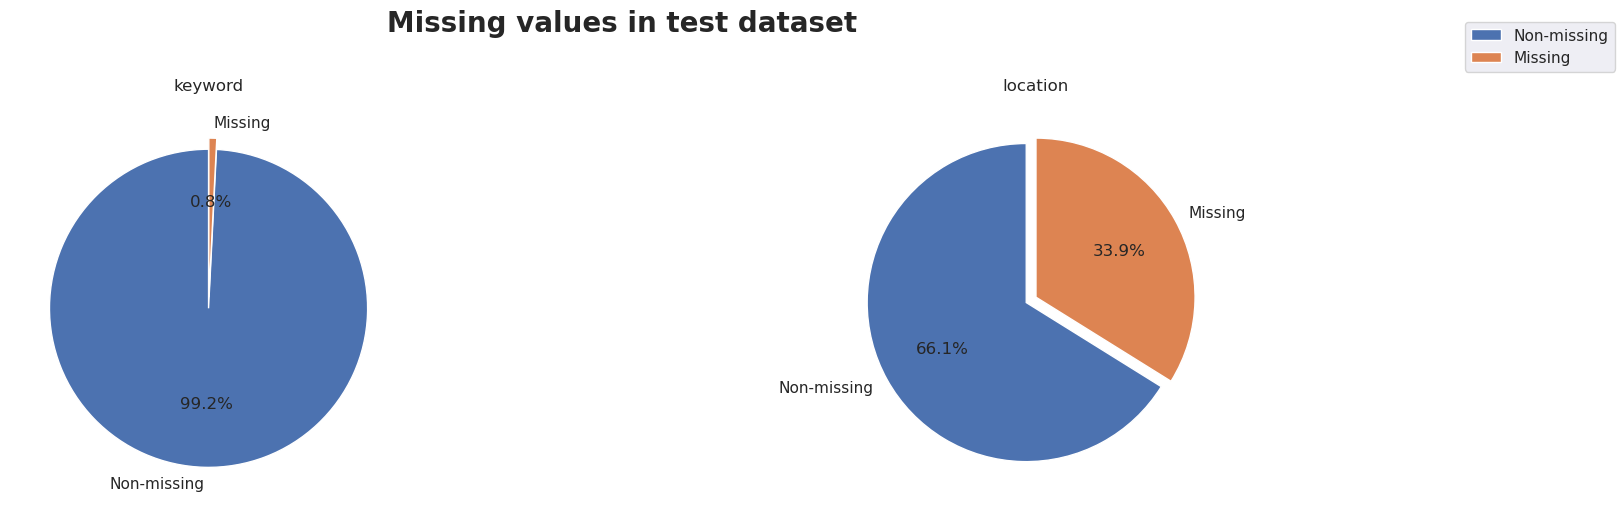

In [6]:
# Visualize missing values in datasets
def visualize_missing_vals(df, title):
    missing_cols = df.columns[df.isna().any()].tolist()
    n_cols = 2 
    n_rows = (len(missing_cols) + n_cols - 1) // n_cols  
    sns.set_theme()
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axs = axs.flatten()
    for i, col in enumerate(missing_cols):
        missing_vals = df[col].isna().value_counts().reindex([False, True])
#         print(missing_vals)
        axs[i].pie(missing_vals, labels=['Non-missing', 'Missing'], autopct='%1.1f%%', startangle=90,explode = (0.07,0))
        axs[i].set_title(col)
    lines_labels = [ax.get_legend_handles_labels() for ax in axs]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    unique_labels = set(labels)
    legend_dict = dict(zip(labels, lines))
    unique_lines = [legend_dict[x] for x in unique_labels]
    fig.legend(unique_lines, unique_labels, bbox_to_anchor=(1, 1))
    for i in range(len(missing_cols), n_rows*n_cols):
        fig.delaxes(axs[i])
    fig.suptitle(title, fontsize=20, fontweight='bold',  y=1.01)
    plt.tight_layout()
    
visualize_missing_vals(train_df, 'Missing values in train dataset')
visualize_missing_vals(test_df, 'Missing values in test dataset')

üí° C·∫£ 2 t·∫≠p train v√† test ƒë·ªÅu b·ªã thi·∫øu 2 c·ªôt l√† **keyword** v√† **location**. Trong ƒë√≥ s·ªë d·ªØ li·ªáu b·ªã thi·∫øu c·ªßa c·ªôt **keyword** kh√° nh·ªè(ch∆∞a ƒë·∫øn 1%) c√≤n c·ªôt **location** c√≥ d·ªØ li·ªáu thi·∫øu kh√° l·ªõn (kho·∫£ng 33%).

## Handling missing values

In [7]:
train_df.keyword.fillna('no_keyword', inplace = True)
train_df.location.fillna('no_location', inplace = True)
test_df.keyword.fillna('no_keyword', inplace = True)
test_df.location.fillna('no_location', inplace = True)

## Embeddings Coverage

Trong x·ª≠ l√Ω ng√¥n ng·ªØ t·ª± nhi√™n, m·ªôt trong nh·ªØng ph∆∞∆°ng ph√°p t·ªët nh·∫•t ƒë·ªÉ ph√¢n lo·∫°i vƒÉn b·∫£n l√† s·ª≠ d·ª•ng pretrained text. V·ªõi GloVe, ch√∫ng ta c√≥ th·ªÉ c√≥ m·ªôt t·ª´ ƒëi·ªÉn c√°c t·ª´, m·ªôt t·ª´ ƒëi·ªÉn gi√∫p ch√∫ng ta bi·∫øt nh·ªØng t·ª´ n√†o ƒë∆∞·ª£c vi·∫øt ƒë√∫ng ch√≠nh t·∫£ v√† c√≥ th·ªÉ ƒë∆∞·ª£c x√°c ƒë·ªãnh b·∫±ng m·ªôt m·∫°ng l∆∞·ªõi th·∫ßn kinh.

In [8]:
%%time
glove_embeddings = np.load("/kaggle/input/glove840b300d-for-pre-train/glove.840B.300d.pkl", allow_pickle=True)

CPU times: user 8.78 s, sys: 3.19 s, total: 12 s
Wall time: 29.7 s


In [9]:
def build_vocab(X):
    
    tweets = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for tweet in tweets:
        for word in tweet:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab


def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train_df['text'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test_df['text'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

GloVe Embeddings cover 52.06% of vocabulary and 82.68% of text in Training Set
GloVe Embeddings cover 57.21% of vocabulary and 81.85% of text in Test Set


C√°c t·ª´ n·∫±m trong giao ƒëi·ªÉm c·ªßa vocab v√† embledings ƒë∆∞·ª£c l∆∞u tr·ªØ ·ªü d·∫°ng covered c√πng v·ªõi s·ªë l∆∞·ª£ng c·ªßa ch√∫ng. C√°c t·ª´ trong vocab kh√¥ng t·ªìn t·∫°i trong ph·∫ßn nh√∫ng ƒë∆∞·ª£c l∆∞u tr·ªØ trong oov c√πng v·ªõi s·ªë l∆∞·ª£ng c·ªßa ch√∫ng. n_cover v√† n_oov l√† t·ªïng s·ªë l·∫ßn ƒë·∫øm v√† ch√∫ng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√≠nh ph·∫ßn trƒÉm m·ª©c ƒë·ªô bao ph·ªß.

Ph·∫ßn nh√∫ng GloVe c√≥ h∆°n 50% t·ª´ v·ª±ng v√† 80% vƒÉn b·∫£n m√† kh√¥ng c·∫ßn l√†m s·∫°ch ·ªü c·∫£ hai t·∫≠p train v√† test.

## Text Cleaning

C√°c tweet c·∫ßn ph·∫£i l√†m s·∫°ch kh√° nhi·ªÅu nh∆∞ng vi·ªác l√†m s·∫°ch t·ª´ng tweet l√† kh√¥ng hi·ªáu qu·∫£ v√¨ ti√™u t·ªën r·∫•t nhi·ªÅu th·ªùi gian. N√™n ta c·∫ßn l√†m s·∫°ch chung cho c√°c tweet b·∫±ng c√°c c√°ch:
- T√°ch bi·ªát c√°c k√≠ t·ª± ra kh·ªèi c√°c t·ª´ nh∆∞: , @, !, ?, +, &, -, $, =, <, >, |, {, }, ^, ', (, ),[, ], *, %, ..., ', ., :, ; 
- Lo·∫°i b·ªè c√°c k√≠ t·ª± ƒë·∫∑c bi·ªát.
- X√≥a c√°c url
- M·ªü r·ªông c√°c t·ª´ ng·ªØ b·ªã vi·∫øt t·∫Øt.
- ƒê∆∞a c√°c k√≠ t·ª± m√£ h√≥a v·ªÅ k√≠ t·ª± th·ª±c t·∫ø c·ªßa ch√∫ng.
- S·ª≠a l·∫°i c√°c t·ª´ b·ªã m·∫Øc l·ªói ch√≠nh t·∫£.
- Ch·ªânh s·ª≠a c√°c Hagtags v√† usernames.
-...

In [10]:
%%time

def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89√õ_", "", tweet)
    tweet = re.sub(r"\x89√õ√í", "", tweet)
    tweet = re.sub(r"\x89√õ√ì", "", tweet)
    tweet = re.sub(r"\x89√õ√èWhen", "When", tweet)
    tweet = re.sub(r"\x89√õ√è", "", tweet)
    tweet = re.sub(r"China\x89√õ¬™s", "China's", tweet)
    tweet = re.sub(r"let\x89√õ¬™s", "let's", tweet)
    tweet = re.sub(r"\x89√õ√∑", "", tweet)
    tweet = re.sub(r"\x89√õ¬™", "", tweet)
    tweet = re.sub(r"\x89√õ\x9d", "", tweet)
    tweet = re.sub(r"√•_", "", tweet)
    tweet = re.sub(r"\x89√õ¬¢", "", tweet)
    tweet = re.sub(r"\x89√õ¬¢√•√ä", "", tweet)
    tweet = re.sub(r"from√•√äwounds", "from wounds", tweet)
    tweet = re.sub(r"√•√ä", "", tweet)
    tweet = re.sub(r"√•√à", "", tweet)
    tweet = re.sub(r"Jap√å_n", "Japan", tweet)    
    tweet = re.sub(r"√å¬©", "e", tweet)
    tweet = re.sub(r"√•¬®", "", tweet)
    tweet = re.sub(r"Suru√å¬§", "Suruc", tweet)
    tweet = re.sub(r"√•√á", "", tweet)
    tweet = re.sub(r"√•¬£3million", "3 million", tweet)
    tweet = re.sub(r"√•√Ä", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89√õ¬™t", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89√õ¬™m", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89√õ¬™ve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89√õ¬™s", "it is", tweet)
    tweet = re.sub(r"doesn\x89√õ¬™t", "does not", tweet)
    tweet = re.sub(r"It\x89√õ¬™s", "It is", tweet)
    tweet = re.sub(r"Here\x89√õ¬™s", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89√õ¬™ve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89√õ¬™t", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89√õ¬™t", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89√õ¬™s", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89√õ¬™re", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89√õ¬™t", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89√õ¬™t", "Cannot", tweet)
    tweet = re.sub(r"you\x89√õ¬™ll", "you will", tweet)
    tweet = re.sub(r"I\x89√õ¬™d", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"don√•¬´t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
   # Emails:
    tweet = re.sub(r'[a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+._-]+', "", tweet)
    
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"m√å¬ºsica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

train_df['text'] = train_df['text'].apply(lambda s : clean(s))
test_df['text'] = test_df['text'].apply(lambda s : clean(s))

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train_df['text'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test_df['text'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

GloVe Embeddings cover 82.89% of vocabulary and 97.14% of text in Training Set
GloVe Embeddings cover 88.09% of vocabulary and 97.32% of text in Test Set
CPU times: user 7min 50s, sys: 267 ms, total: 7min 51s
Wall time: 7min 52s


In [11]:
train_df

id     keyword     location  \
0         1  no_keyword  no_location   
1         4  no_keyword  no_location   
2         5  no_keyword  no_location   
3         6  no_keyword  no_location   
4         7  no_keyword  no_location   
...     ...         ...          ...   
7608  10869  no_keyword  no_location   
7609  10870  no_keyword  no_location   
7610  10871  no_keyword  no_location   
7611  10872  no_keyword  no_location   
7612  10873  no_keyword  no_location   

                                                   text  target  
0     Our Deeds are the Reason of this  # earthquake...       1  
1              Forest fire near La Ronge Sask .  Canada       1  
2     All residents asked to  ' shelter in place '  ...       1  
3     13,000 people receive  # wildfires evacuation ...       1  
4     Just got sent this photo from Ruby  # Alaska a...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609   @ Aria Ahrary  @ TheTawniest The out of contr...       1  
7610  M1 . 94  [ 01 : 04 UTC ]  ? 5km S of Volcano H...       1  
7611  Police investigating after an e - bike collide...       1  
7612  The Latest :  More Homes Razed by Northern Cal...       1  

[7613 rows x 5 columns]

In [12]:
# Ta th·ª±c hi·ªán x√≥a glove_embeding v√† nh·ªØng bi·∫øn li√™n quan v√¨ ch√∫ng ti√™u t·ªën r·∫•t nhi·ªÅu b·ªô nh·ªõ
import gc
del glove_embeddings, train_glove_oov, test_glove_oov
gc.collect()

4944

# Modeling using Bert

BERT (Bidirectional Encoder Representations from Transformers) l√† m·ªôt m√¥ h√¨nh ng√¥n ng·ªØ (Language Model) ƒë∆∞·ª£c t·∫°o ra b·ªüi Google AI. BERT ƒë∆∞·ª£c coi nh∆∞ l√† ƒë·ªôt ph√° l·ªõn trong Machine Learning b·ªüi v√¨ kh·∫£ nƒÉng ·ª©ng d·ª•ng c·ªßa n√≥ v√†o nhi·ªÅu b√†i to√°n NLP kh√°c nhau: Question Answering, Natural Language Inference,... v·ªõi k·∫øt qu·∫£ r·∫•t t·ªët.

BERT l√† m·ªôt trong nh·ªØng ƒë·∫°i di·ªán ∆∞u t√∫ nh·∫•t trong Transfer Learning cho NLP, n√≥ g√¢y ti·∫øng vang l·ªõn kh√¥ng ch·ªâ b·ªüi k·∫øt qu·∫£ mang l·∫°i trong nhi·ªÅu b√†i to√°n kh√°c nhau, m√† c√≤n b·ªüi v√¨ n√≥ ho√†n to√†n mi·ªÖn ph√≠, t·∫•t c·∫£ ch√∫ng ta ƒë·ªÅu c√≥ th·ªÉ s·ª≠ d·ª•ng BERT cho b√†i to√°n c·ªßa m√¨nh.

BERT s·ª≠ d·ª•ng Transformer l√† m·ªôt m√¥ h√¨nh attention (attention mechanism) h·ªçc m·ªëi t∆∞∆°ng quan gi·ªØa c√°c t·ª´ (ho·∫∑c 1 ph·∫ßn c·ªßa t·ª´) trong m·ªôt vƒÉn b·∫£n. Transformer g·ªìm c√≥ 2 ph·∫ßn ch√≠nh: Encoder v√† Decoder, encoder th·ª±c hi·ªán ƒë·ªçc d·ªØ li·ªáu ƒë·∫ßu v√†o v√† decoder ƒë∆∞a ra d·ª± ƒëo√°n. ·ªû ƒë√¢y, BERT ch·ªâ s·ª≠ d·ª•ng Encoder.

Kh√°c v·ªõi c√°c m√¥ h√¨nh directional (c√°c m√¥ h√¨nh ch·ªâ ƒë·ªçc d·ªØ li·ªáu theo 1 chi·ªÅu duy nh·∫•t - tr√°i‚Üíph·∫£i, ph·∫£i‚Üí tr√°i) ƒë·ªçc d·ªØ li·ªáu theo d·∫°ng tu·∫ßn t·ª±, Encoder ƒë·ªçc to√†n b·ªô d·ªØ li·ªáu trong 1 l·∫ßn, vi·ªác n√†y l√†m cho BERT c√≥ kh·∫£ nƒÉng hu·∫•n luy·ªán d·ªØ li·ªáu theo c·∫£ hai chi·ªÅu, qua ƒë√≥ m√¥ h√¨nh c√≥ th·ªÉ h·ªçc ƒë∆∞·ª£c ng·ªØ c·∫£nh (context) c·ªßa t·ª´ t·ªët h∆°n b·∫±ng c√°ch s·ª≠ d·ª•ng nh·ªØng t·ª´ xung quanh n√≥ (ph·∫£i&tr√°i).

In [13]:
# Image("/kaggle/input/image-bert/transformer.png")

H√¨nh tr√™n m√¥ t·∫£ nguy√™n l√Ω ho·∫°t ƒë·ªông c·ªßa Encoder. Theo ƒë√≥, input ƒë·∫ßu v√†o l√† m·ªôt chu·ªói c√°c token w1, w2,...ƒë∆∞·ª£c bi·ªÉu di·ªÖn th√†nh chu·ªói c√°c vector tr∆∞·ªõc khi ƒë∆∞a v√†o trong m·∫°ng neural. Output c·ªßa m√¥ h√¨nh l√† chu·ªói ccs vector c√≥ k√≠ch th∆∞·ªõc ƒë√∫ng b·∫±ng k√≠ch th∆∞·ªõc input. Trong khi hu·∫•n luy·ªán m√¥ h√¨nh, m·ªôt th√°ch th·ª©c g·∫∑p ph·∫£i l√† c√°c m√¥ h√¨nh directional truy·ªÅn th·ªëng g·∫∑p gi·ªõi h·∫°n khi h·ªçc ng·ªØ c·∫£nh c·ªßa t·ª´. ƒê·ªÉ kh·∫Øc ph·ª•c nh∆∞·ª£c ƒëi·ªÉm c·ªßa c√°c m√¥ h√¨nh c≈©, BERT s·ª≠ d·ª•ng 2 chi·∫øn l∆∞·ª£c training l√† MLM v√† NSP.

**·ª®ng d·ª•ng c·ªßa Bert v√†o ph√¢n lo·∫°i vƒÉn b·∫£n:**  ta s·∫Ω c√πng s·ª≠ d·ª•ng BERT pretrained-model cho b√†i to√°n ph√¢n lo·∫°i vƒÉn b·∫£n (Text Classification - l√† m·ªôt trong nh·ªØng b√†i to√°n ph·ªï bi·∫øn nh·∫•t trong NLP, gi·∫£i quy·∫øt nhi·ªÅu v·∫•n ƒë·ªÅ th·ª±c t·∫ø nh∆∞ ph√¢n t√≠ch ng·ªØ nghƒ©a, l·ªçc spam, ph√¢n lo·∫°i tin t·ª©c...)

Ta s·ª≠ d·ª•ng th∆∞ vi·ªán Huggingface l√† m·ªôt th∆∞ vi·ªán cho ph√©p s·ª≠ d·ª•ng c√°c SOTA (state-of-the-art) transformer tr√™n ng√¥n ng·ªØ Python b·∫±ng framework Pytorch. Tr∆∞·ªõc khi b·∫Øt tay v√†o vi·∫øt code, ta c·∫ßn c√†i ƒë·∫∑t m·ªôt s·ªë th∆∞ vi·ªán sau: Pytorch, torchtext, transformer, matplotlib, pandas, numpy, seaborn.
Ngo√†i Pytorch, BERT c√≤n ƒë∆∞·ª£c c√†i ƒë·∫∑t tr√™n nhi·ªÅu framework kh√°c nh∆∞ tensorflow v√† keras.

In [14]:
# N·∫øu GPU ƒë√£ s·∫µn s√†ng

if torch.cuda.is_available():    

    # N√≥i v·ªõi PyTorch ƒë·ªÉ s·ª≠ d·ª•ng GPU
    
    device = torch.device('cuda')    


    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    #print('We will use the GPU:', torch.cuda.get_device_name(0))

# N·∫øu ch∆∞a c√≥ GPU

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

There are 1 GPU(s) available.


In [15]:
# T·∫£i c√°c data ƒë·ªÉ ch·∫°y m√¥ h√¨nh
train = train_df.copy()
test = test_df.copy()
print(f'Number of training tweets: {train.shape[0]}\n')
print(f'Number of test tweets: {test.shape[0]}\n')

display(train.sample(10))

Number of training tweets: 7613

Number of test tweets: 3263



id      keyword               location  \
2644  3796  destruction            no_location   
2227  3185       deluge            no_location   
5448  7769       police                     UK   
132    191   aftershock            no_location   
6845  9810       trauma  Montgomery County, MD   
5559  7934    rainstorm            no_location   
1765  2538    collision            no_location   
1817  2611      crashed            no_location   
6810  9756      tragedy        Los Angeles, CA   
4398  6254    hijacking          Athens,Greece   

                                                   text  target  
2644  So you have a new weapon that can cause un - i...       1  
2227  The f $  &  @ ing things I do for  # GISHWHES ...       0  
5448  DT  @ georgegalloway :  RT  @ Galloway4Mayor :...       1  
132   Aftershock back to school kick off was great ....       0  
6845  in response to trauma Children of Addicts deve...       0  
5559   @ Calum Hood you look like you got caught in ...       0  
1765  my favorite lady came to our volunteer meeting...       1  
1817   @ brianroemmele UX fail of EMV  -  people wan...       1  
6810  Cannot find my ariana grande shirt  this is a ...       0  
4398   The Murderous Story Of Americas First Hijacking        1

In [16]:
# K·∫øt h·ª£p t·∫≠p train v√† test v·ªõi nhau cho c√°c nhi·ªám v·ª• x·ª≠ l√Ω ti·∫øp theo
# L∆∞u l·∫°i ch·ªâ m·ª•c ƒë·ªÉ chia hai t·∫≠p v·ªÅ tr·∫°ng th√°i ban ƒë·∫ßu sau khi ƒë√£ x·ª≠ l√≠
labels = train['target'].values
idx = len(labels)
combined = pd.concat([train, test])
combined = combined.text.values

In [17]:
# T·∫°o m·ªôt instance c·ªßa BertTokenizer t·ª´ m√¥ h√¨nh "bert-large-uncased" b·∫±ng ph∆∞∆°ng th·ª©c "from_pretrained".
# Thi·∫øt l·∫≠p "do_lower_case = True" ƒë·ªÉ chuy·ªÉn ƒë·ªïi ch·ªØ hoa th√†nh ch·ªØ th∆∞·ªùng.
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

In [18]:
# Ta c√≥ th·ªÉ xem x√©t c√°c c√°c tokenizer l√†m vi·ªác th√¥ng qua v√≠ d·ª• b√™n d∆∞·ªõi

# In ra nh·ªØng tweet ƒë·∫ßu ti√™n

print(' Original: ', combined[0])

# Ph∆∞∆°ng th·ª©c `tokenizer.tokenize()` ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ chia tweet th√†nh c√°c token trong ng·ªØ c·∫£nh c·ªßa m√¥ h√¨nh BERT.
# In ra c√°c token n√†y

print('Tokenized: ', tokenizer.tokenize(combined[0]))

#Ph∆∞∆°ng th·ª©c `tokenizer.convert_tokens_to_ids()` ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ chuy·ªÉn ƒë·ªïi c√°c token th√†nh ID t∆∞∆°ng ·ª©ng.
# In ra c√°c ID c·ªßa c√°c token sau khi ƒë√£ ƒë∆∞·ª£c chuy·ªÉn ƒë·ªïi

print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(combined[0])))

 Original:  Our Deeds are the Reason of this  # earthquake May ALLAH Forgive us all
Tokenized:  ['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
Token IDs:  [2256, 15616, 2024, 1996, 3114, 1997, 2023, 1001, 8372, 2089, 16455, 9641, 2149, 2035]


In [19]:
# T√≠nh ƒë·ªô d√†i t·ªëi ƒëa c·ªßa c√¢u (s·ªë token t·ªëi ƒëa trong c√¢u) trong vƒÉn b·∫£n. 
# ƒêi·ªÅu n√†y h·ªØu √≠ch khi ta mu·ªën x√°c ƒë·ªãnh ƒë·ªô d√†i t·ªëi ƒëa c·∫ßn thi·∫øt ƒë·ªÉ c·∫Øt ho·∫∑c m·ªü r·ªông c√°c c√¢u ƒë·ªÉ chu·∫©n b·ªã d·ªØ li·ªáu cho m√¥ h√¨nh BERT.

max_len = 0
for text in combined:

    # S·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c`encode` c·ªßa tokenizer ƒë·ªÉ chuy·ªÉn ƒë·ªïi vƒÉn b·∫£n th√†nh danh s√°ch `input_ids` c·ªßa c√°c token. 
    # `add_special_tokens=True`: th√™m v√†o c√°c token ƒë·∫∑c bi·ªát nh∆∞ `[CLS]` (ƒë·∫°i di·ªán cho b·∫Øt ƒë·∫ßu c√¢u) v√† `[SEP]` v√†o ph·∫ßn ƒë·∫ßu v√† cu·ªëi c√¢u.
    input_ids = tokenizer.encode(text, add_special_tokens=True)

    # C·∫≠p nh·∫≠t ƒë·ªô d√†i l·ªõn nh·∫•t c·ªßa c√¢u m·ªõi
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  84


Ch·ªçn ƒë·ªô d√†i t·ªëi ƒëa l√† 84 v√¨ n√≥ l√† c√¢u d√†i nh·∫•t m√† ta t√¨m ƒë∆∞·ª£c.

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


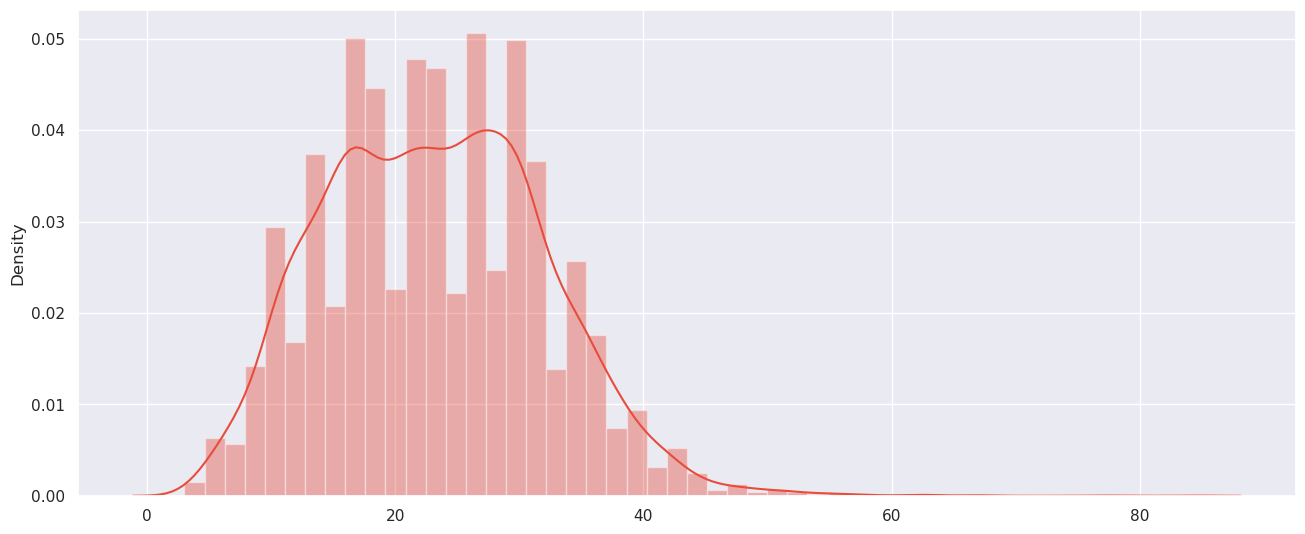

In [20]:
# T·∫°o list ch·ª©a ƒë·ªô d√†i c·ªßa c√°c c√¢u

token_lens = []

for text in combined:
    tokens = tokenizer.encode(text, max_length = 512)
    token_lens.append(len(tokens))

# Tr·ª±c quan ph√¢n b·ªë ƒë·ªô d√†i c·ªßa c√°c c·∫ßu

fig, axes = plt.subplots(figsize=(14, 6))
sns.distplot(token_lens, color='#e74c3c')
plt.show()

In [21]:
# Chia l·∫°i t·∫≠p train v√† test sau khi ti·∫øn h√†nh tokenizing.

train = combined[:idx]
test = combined[idx:]
train.shape

(7613,)

In [22]:
def tokenize_map(sentence,labs='None'):
    
    # H√†m ƒë·ªÉ m√£ h√≥a t·∫•t c·∫£ c√°c c√¢u v√† √°nh x·∫° c√°c tokens t·ªõi ID c·ªßa ch√∫ng.
    
    global labels
    
    input_ids = []
    attention_masks = []

    # For every sentence...
    
    for text in sentence:
        #   Ph∆∞∆°ng th·ª©c "encode_plus" s·∫Ω
        
        #   (1) Tokenize c√¢u.
        #   (2) Th√™m token `[CLS]` v√†o ƒë·∫ßu c√¢u
        #   (3) N·ªëi token `[SEP]` v√†o cu·ªëi c√¢u
        #   (4) √Ånh x·∫° tokens t·ªõi IDs c·ªßa ch√∫ng.
        #   (5) Th√™m ho·∫∑c c·∫Øt ng·∫Øn c√¢u theo `max_length`
        #   (6) T·∫°o attention masks cho tokens [PAD]
        
        encoded_dict = tokenizer.encode_plus(
                            text,                      # c√¢u c·∫ßn m√£ h√≥a
                            add_special_tokens = True, # th√™m c√°c m√£ `[CLS]` v√† `[SEP]` v√†o ƒë·∫ßu v√† cu·ªëi c√¢u.
                            truncation='longest_first',# x√°c ƒë·ªãnh chi·ªÅu d√†i t·ªëi ƒëa v√† ƒëi·ªÅu khi·ªÉn vi·ªác c·∫Øt c√¢u.
                            max_length = 84,           # chi·ªÅu d√†i t·ªëi ƒëa c·ªßa c√¢u
                            pad_to_max_length = True,  # th√™m c√°c token ƒë·ªám ƒë·ªÉ ƒë·∫£m b·∫£o t·∫•t c·∫£ c√°c c√¢u c√≥ c√πng ƒë·ªô d√†i.
                            return_attention_mask = True,   # T·∫°o attention mask cho c√°c token
                            return_tensors = 'pt',     # tr·∫£ v·ªÅ c√°c tensors PyTorch.
                       )

        # Th√™m c√¢u ƒë∆∞·ª£c m√£ h√≥a v√†o list id
        
        input_ids.append(encoded_dict['input_ids'])

        # V√† attention mask c·ªßa n√≥
        
        attention_masks.append(encoded_dict['attention_mask'])

    # Chuy·ªÉn ƒë·ªïi danh s√°ch th√†nh c√°c tensors 
    
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    
    if labs != 'None': 
        labels = torch.tensor(labels)# n·∫øu labs kh√°c None chuy·ªÉn ƒë·ªïi danh s√°ch nh√£n `labels` th√†nh m·ªôt tensor  
        return input_ids, attention_masks, labels #tr·∫£ v·ªÅ `input_ids`, `attention_masks`, v√† `labels`.
    else:
        return input_ids, attention_masks # Tr·∫£ v·ªÅ input_ids v√† attention_masks

In [23]:
# Tokenizing t·∫•t c·∫£ c√°c c√¢u trong t·∫≠p train v√† test v√† √°nh x·∫° c√°c tokens t·ªõi Ids c·ªßa ch√∫ng

input_ids, attention_masks, labels = tokenize_map(train, labels)
test_input_ids, test_attention_masks= tokenize_map(test)

In [24]:
# Ta ti·∫øn h√†nh chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p train v√† t·∫≠p validation ƒë·ªÉ s·ª≠ d·ª•ng trong qu√° tr√¨nh hu·∫•n luy·ªán v√† ƒë√°nh gi√° m√¥ h√¨nh.

# t·∫≠p train v·ªõi c√°c ƒë·∫ßu v√†o `input_ids`, `attention_masks` v√† `labels` ƒë∆∞·ª£c k·∫øt h·ª£p th√†nh m·ªôt TensorDataset. 
# TensorDataset l√† m·ªôt l·ªõp trong PyTorch gi√∫p l∆∞u tr·ªØ c√°c tensor v√† cung c·∫•p c√°c ph∆∞∆°ng ph√°p ƒë·ªÉ truy xu·∫•t d·ªØ li·ªáu.

dataset = TensorDataset(input_ids, attention_masks, labels)

# Chia t·∫≠p train th√†nh 80% train v√† 20% cho validation

# T√≠nh s·ªë m·∫´u cho hai t·∫≠p train v√† validation.

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Chia th√†nh hai t·∫≠p v·ªõi c√°c m·∫´u ng·∫´u nhi√™n theo k√≠ch th∆∞·ªõc ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh.

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

6,090 training samples
1,523 validation samples


In [25]:
# DataLoader c·∫ßn bi·∫øt k√≠ch th∆∞·ªõc batch size ƒë·ªÉ hu·∫•n luy·ªán
# Ta ch·ªçn batch_size = 16 t∆∞∆°ng th√≠ch v·ªõi ƒë·ªÅ ngh·ªã c·ªßa t√°c gi·∫£ BERT cho batch size khi fine-tuning tr√™n m·ªôt t√°c v·ª• c·ª• th·ªÉ.

batch_size = 16

# T·∫°o DataLoaders cho t·∫≠p train v√† validation.
# Ta s·∫Ω l·∫•y m·∫´u ƒë√†o t·∫°o theo th·ª© t·ª± ng·∫´u nhi√™n. 

train_dataloader = DataLoader(
            train_dataset,  # C√°c m·∫´u cho t·∫≠p train.
            sampler = RandomSampler(train_dataset), # ch·ªçn c√°c batch m·∫´u m·ªôt c√°ch ng·∫´u nhi√™n t·ª´ t·∫≠p d·ªØ li·ªáu
                                                    #  ƒêi·ªÅu n√†y gi√∫p ƒë·∫£m b·∫£o m·ªói l·∫ßn hu·∫•n luy·ªán ƒë·ªÅu s·ª≠ d·ª•ng c√°c m·∫´u kh√°c nhau
            batch_size = batch_size # c√°c batch c√≥ k√≠ch th∆∞·ªõc ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh b·ªüi batch_size.
        )

# ƒê·ªëi v·ªõi t·∫≠p validation ta s·∫Ω l·∫•y m·∫´u theo tu·∫ßn t·ª±.

validation_dataloader = DataLoader(
            val_dataset, # C√°c m·∫´u cho t·∫≠p validation.
            sampler = SequentialSampler(val_dataset), # ch·ªçn c√°c batch m·∫´u theo th·ª© t·ª± tu·∫ßn t·ª± t·ª´ t·∫≠p d·ªØ li·ªáu
            # Do qu√° tr√¨nh ki·ªÉm tra kh√¥ng ·∫£nh h∆∞·ªüng b·ªüi th·ª© t·ª± c·ªßa c√°c m·∫´u, ta c√≥ th·ªÉ ƒë·ªçc ch√∫ng theo th·ª© t·ª± tu·∫ßn t·ª±.
            batch_size = batch_size # c√°c batch c√≥ k√≠ch th∆∞·ªõc ƒë∆∞·ª£c ch·ªâ ƒë·ªãnh b·ªüi batch_size.
        )

In [26]:
# L∆∞u tr·ªØ d·ªØ li·ªáu ƒë·∫ßu v√†o v√† attention masks c·ªßa t·∫≠p ki·ªÉm tra.
prediction_data = TensorDataset(test_input_ids, test_attention_masks)
# ch·ªçn c√°c m·∫´u t·ª´ `prediction_data` theo tu·∫ßn t·ª±, gi√∫p ƒë·∫£m b·∫£o l·∫•y c√°c m·∫´u theo th·ª© t·ª± t∆∞∆°ng ·ª©ng v·ªõi v·ªã tr√≠ c·ªßa ch√∫ng trong t·∫≠p ki·ªÉm tra.
prediction_sampler = SequentialSampler(prediction_data)
# truy c·∫≠p c√°c mini-batch t·ª´ d·ªØ li·ªáu d·ª± ƒëo√°n trong qu√° tr√¨nh d·ª± ƒëo√°n.
# K√≠ch th∆∞·ªõc c·ªßa c√°c mini-batch ƒë∆∞·ª£c x√°c ƒë·ªãnh b·ªüi `batch_size`.
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

## Setting Bert Classification Model

**BertForSequenceClassification** l√† m·ªôt l·ªõp m√¥ h√¨nh trong th∆∞ vi·ªán Hugging Face Transformers, ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ th·ª±c hi·ªán t√°c v·ª• ph√¢n lo·∫°i chu·ªói (sequence classification) b·∫±ng c√°ch s·ª≠ d·ª•ng ki·∫øn tr√∫c c·ªßa BERT (Bidirectional Encoder Representations from Transformers).N√≥ k·∫øt h·ª£p c·∫£ kh·∫£ nƒÉng hi·ªÉu ng·ªØ nghƒ©a c·ªßa BERT l·∫´n kh·∫£ nƒÉng ph√¢n lo·∫°i c·ªßa m√¥ h√¨nh tuy·∫øn t√≠nh ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n nh√£n cho c√°c chu·ªói vƒÉn b·∫£n.

In [27]:
# S·ª≠ d·ª•ng BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    'bert-large-uncased', # Use 124-layer, 1024-hidden, 16-heads, 340M parameters BERT model with an uncased vocab.
    num_labels = 2, # s·ªë l∆∞·ª£ng nh√£n ƒë·∫ßu ra trong t√°c v·ª• ph√¢n lo·∫°i chu·ªói. N√≥ x√°c ƒë·ªãnh s·ªë l∆∞·ª£ng c√°c l·ªõp (classes) m√† model c√≥ th·ªÉ d·ª± ƒëo√°n cho m·ªói chu·ªói.  
    output_attentions = False, #  ch·ªâ ƒë·ªãnh li·ªáu m√¥ h√¨nh c√≥ tr·∫£ v·ªÅ tr·ªçng s·ªë attention hay kh√¥ng
    output_hidden_states = False, # ch·ªâ ƒë·ªãnh li·ªáu m√¥ h√¨nh c√≥ tr·∫£ v·ªÅ tr·∫°ng th√°i ·∫©n c·ªßa t·∫•t c·∫£ c√°c l·ªõp ·∫©n hay kh√¥ng
)

# y√™u c·∫ßu pytorch ch·∫°y m√¥ h√¨nh n√†y tr√™n thi·∫øt b·ªã m√† ta ƒë√£ c√†i ƒë·∫∑t GPU

model.to(device)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,

In [28]:
# L·∫•y t·∫•t c·∫£ c√°c tham s·ªë c·ªßa m√¥ h√¨nh

params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))

The BERT model has 393 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 1024)
bert.embeddings.position_embeddings.weight               (512, 1024)
bert.embeddings.token_type_embeddings.weight               (2, 1024)
bert.embeddings.LayerNorm.weight                             (1024,)
bert.embeddings.LayerNorm.bias                               (1024,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.query.bias               (1024,)
bert.encoder.layer.0.attention.self.key.weight          (1024, 1024)
bert.encoder.layer.0.attention.self.key.bias                 (1024,)
bert.encoder.layer.0.attention.self.value.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.value.bias               (1024,)
bert.encoder.layer.0.attention.output.dense.weight      (1024, 1024)
bert.encoder.layer.0.attention.output.dense.bias             (

AdamW l√† m·ªôt bi·∫øn th·ªÉ c·ªßa thu·∫≠t to√°n t·ªëi ∆∞u Adam, ƒë∆∞·ª£c s·ª≠a ƒë·ªïi ƒë·ªÉ kh·∫Øc ph·ª•c v·∫•n ƒë·ªÅ trung b√¨nh h√≥a theo tr·ªçng l∆∞·ª£ng (weight decay) trong qu√° tr√¨nh t·ªëi ∆∞u h√≥a. Bi·∫øn th·ªÉ n√†y gi√∫p c·∫£i thi·ªán hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh BERT.

In [29]:
# t·∫°o optimizer cho m√¥ h√¨nh BERT s·ª≠ d·ª•ng thu·∫≠t to√°n t·ªëi ∆∞u AdamW t·ª´ th∆∞ vi·ªán Hugging Face Transformers.

optimizer = AdamW(model.parameters(), # l·∫•y danh s√°ch t·∫•t c·∫£ c√°c tham s·ªë c·ªßa m√¥ h√¨nh bert
                  lr = 6e-6, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )

In [30]:
epochs = 3 # s·ªë v√≤ng l·∫∑p m√† m√¥ h√¨nh s·∫Ω ƒë∆∞·ª£c hu·∫•n luy·ªán

# T·ªïng s·ªë b∆∞·ªõc hu·∫•n luy·ªán ƒë∆∞·ª£c t√≠nh b·∫±ng [number of batches] x [number of epochs]
total_steps = len(train_dataloader) * epochs

# T·∫°o learning rate scheduler.
# N√≥ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ƒëi·ªÅu ch·ªânh t·ªëc ƒë·ªô h·ªçc c·ªßa m√¥ h√¨nh theo th·ªùi gian ƒë·ªÉ c√≥ ƒë∆∞·ª£c k·∫øt qu·∫£ t·ªët h∆°n. 

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

## Training and Evaluating

In [31]:
# C·∫£ hai h√†m `flat_accuracy` v√† `flat_f1` l√† c√°c h√†m h·ªó tr·ª£ ƒë·ªÉ t√≠nh to√°n 
# c√°c th√¥ng s·ªë ƒë√°nh gi√° quan tr·ªçng cho m√¥ h√¨nh d·ª± ƒëo√°n, 
# gi√∫p ƒë√°nh gi√° hi·ªáu su·∫•t v√† ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh.

def flat_accuracy(preds, labels):
    
    """H√†m d√πng ƒë·ªÉ t√≠nh to√°n ƒë·ªô ch√≠nh x√°c (accuracy)"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return accuracy_score(labels_flat, pred_flat)

def flat_f1(preds, labels):
    
    """H√†m d√πng ƒë·ªÉ t√≠nh to√°n f1 scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return f1_score(labels_flat, pred_flat)

In [32]:
def format_time(elapsed):    
    
    # H√†m ƒë·ªãnh d·∫°ng th·ªùi gian t·ª´ m·ªôt gi√° tr·ªã th·ªùi gian ƒë√£ cho 
    # ƒë∆∞·ª£c t√≠nh b·∫±ng s th√†nh chu·ªói c√≥ d·∫°ng hh:mm:ss
    
    # Gi√° tr·ªã th·ªùi gian ƒë√£ cho ƒë∆∞·ª£c l√†m tr√≤n ƒë·∫øn gi√¢y
    elapsed_rounded = int(round((elapsed)))
    
    # ƒê·ªãnh d·∫°ng v·ªÅ hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [33]:
# References: https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Kh·ªüi t·∫°o m·ªôt danh s√°ch r·ªóng c√≥ t√™n training_stats ƒë·ªÉ l∆∞u tr·ªØ c√°c th·ªëng k√™ hu·∫•n luy·ªán.
training_stats = []

# ƒêo th·ªùi gian b·∫Øt ƒë·∫ßu tr∆∞·ªõc khi v√≤ng l·∫∑p hu·∫•n luy·ªán v√† ƒë√°nh gi√° b·∫Øt ƒë·∫ßu.

total_t0 = time.time()

# V·ªõi m·ªói epoch:

for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================

    print('')
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # T√≠nh th·ªùi gian ch·∫°y m·ªôt epoch b·∫±ng t0:
    
    t0 = time.time()

    # ƒê·∫∑t l·∫°i gi√° tr·ªã m·∫•t m√°t cho epoch n√†y.
    
    total_train_loss = 0

    # chuy·ªÉn ch·∫ø ƒë·ªô hu·∫•n luy·ªán cho m√¥ h√¨nh. 
    # source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch
    
    model.train()

    # V·ªõi m·ªói batch c·ªßa d·ªØ li·ªáu train
    
    for step, batch in enumerate(train_dataloader):

        # C·∫≠p nh·∫≠t qu√° tr√¨nh m·ªói 50 batches.
        if step % 50 == 0 and not step == 0:
            # T√≠nh th·ªùi gian th·ª±c hi·ªán
            elapsed = format_time(time.time() - t0)
            
            # B√°o c√°o qu√° tr√¨nh th·ª±c hi·ªán.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Gi·∫£i n√©n batch t·ª´ dataloader. 
        #
        # Khi ti·∫øn h√†nh gi·∫£i n√©n batch, ti·∫øn h√†nh sao ch√©p t·ª´ng tensor v√†o thi·∫øt b·ªã(gpu) b·∫±ng c√°ch d√πng ph∆∞∆°ng th·ª©c 'to'
        #
        # `batch` ch·ª©a 3 pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        
        b_input_ids = batch[0].to(device).to(torch.int64)
        b_input_mask = batch[1].to(device).to(torch.int64)
        b_labels = batch[2].to(device).to(torch.int64)

        # Source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
        # X√≥a c√°c gradient hi·ªán c√≥ b·∫±ng model.zero_grad() ƒë·ªÉ tr√°nh t√≠ch l≈©y ch√∫ng.
        model.zero_grad()        

        # Th·ª±c hi·ªán qu√° tr√¨nh forward pass qua m√¥ h√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng d·ªØ li·ªáu ƒë·∫ßu v√†o v√† l·∫•y t·ªïn th·∫•t v√† logits.
        # References: https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers BertForSequenceClassification.
        
        # K·∫øt qu·∫£ s·∫Ω tr·∫£ v·ªÅ gi√° tr·ªã loss
        # V√† 'logits' l√† ƒë·∫ßu ra c·ªßa m√¥ h√¨nh tr∆∞·ªõc khi k√≠ch ho·∫°t.
        
        result = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = result.loss
        logits = result.logits

        # T√≠ch l≈©y training loss tr√™n t·∫•t c·∫£ c√°c batches sau ƒë√≥ t√≠nh to√°n loss trung b√¨nh. 
        # `loss` l√† m·ªôt tensor ch·ª©a m·ªôt gi√° tr·ªã duy nh·∫•t; ph∆∞∆°ng th·ª©c`.item()` ch·ªâ tr·∫£ v·ªÅ gi√° tr·ªã t·ª´ tensor.
        
        total_train_loss += loss.item()

        # Th·ª±c hi·ªán m·ªôt backward pass ƒë·∫ª t√≠nh to√°n gradients
        
        loss.backward()

        # Gi·ªõi h·∫°n norm c·ªßa gradient ƒë·ªÉ tr√°nh hi·ªán t∆∞·ª£ng gradient b√πng n·ªï.
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # C·∫≠p nh·∫≠t c√°c tham s·ªë c·ªßa m√¥ h√¨nh v·ªõi gradient ƒë√£ t√≠nh to√°n
             
        optimizer.step()

        # C·∫≠p nh·∫≠t learning rate b·∫±ng c√°ch s·ª≠ d·ª•ng scheduler
        
        scheduler.step()

    # T√≠nh gi√° tr·ªã trung b√¨nh c·ªßa t·ªïn th·∫•t hu·∫•n luy·ªán cho epoch n√†y..
    
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # ƒêo th·ªùi gian hu·∫•n luy·ªán cho epoch n√†y.
    
    training_time = format_time(time.time() - t0)
    
    # In t·ªïn th·∫•t hu·∫•n luy·ªán trung b√¨nh v√† th·ªùi gian hu·∫•n luy·ªán.
    print('')
    print('  Average training loss: {0:.2f}'.format(avg_train_loss))
    print('  Training epcoh took: {:}'.format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # Sau khi ho√†n th√†nh xong m·ªói m·ªôt training epoch, ti·∫øn h√†nh ƒëo l∆∞·ªùng hi·ªáu su·∫•t tr√™n t·∫≠p validation.
    print('')
    print('Running Validation...')

    t0 = time.time()

    # Chuy·ªÉn m√¥ h√¨nh sang ch·∫ø ƒë·ªô ƒë√°nh gi√° (model.eval()) ƒë·ªÉ th·ª±c hi·ªán x√°c th·ª±c.
    
    model.eval()

    # Thi·∫øt l·∫≠p c√°c bi·∫øn ƒë·ªÉ l∆∞u c√°c ch·ªâ s·ªë ƒë√°nh gi√°:
    
    total_eval_accuracy = 0
    total_eval_loss = 0
    total_eval_f1 = 0
    nb_eval_steps = 0

    # Th·ª±c hi·ªán ƒë√°nh gi√° cho m·ªôt epoch.
    
    for batch in validation_dataloader:
        
        # Gi·∫£i n√©n training batch t·ª´ dataloader. 
        
        # Khi ti·∫øn h√†nh gi·∫£i n√©n batch, ti·∫øn h√†nh sao ch√©p t·ª´ng tensor v√†o thi·∫øt b·ªã(gpu) b·∫±ng c√°ch d√πng ph∆∞∆°ng th·ª©c 'to'
        
        # `batch` ch·ª©a 3 pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device).to(torch.int64)
        b_input_mask = batch[1].to(device).to(torch.int64)
        b_labels = batch[2].to(device).to(torch.int64)
        
        # Th·ª±c hi·ªán qu√° tr√¨nh lan truy·ªÅn thu·∫≠n tr√™n m√¥ h√¨nh ƒë·ªÉ l·∫•y t·ªïn th·∫•t v√† logits.
        with torch.no_grad():        

            # Forward pass, t√≠nh to√°n d·ª± ƒëo√°n logit.
            # References: https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers BertForSequenceClassification.
            result1 = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = result1.loss
            logits = result1.logits
            
        # T√≠ch l≈©y validation loss.
        
        total_eval_loss += loss.item()

        # Di chuy·ªÉn logits v√† labels t·ªõi CPU:
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # T√≠nh to√°n ƒë·ªô ch√≠nh x√°c v√† t√≠ch l≈©y cho t·∫•t c·∫£ c√°c batches
        
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
        

    # ƒê·ªô ch√≠nh x√°c v√† f1-score trung b√¨nh cho m·ªói l·∫ßn validation
    
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print('  Accuracy: {0:.2f}'.format(avg_val_accuracy))
    
    avg_val_f1 = total_eval_f1 / len(validation_dataloader)
    print('  F1: {0:.2f}'.format(avg_val_f1))

    # T√≠nh to√°n loss trung b√¨nh tr√™n t·∫•t c·∫£ c√°c batches.
    
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # ƒêo l∆∞·ªùng th·ªùi gian ch·∫°y c·ªßa m·ªói l·∫ßn validation
    
    validation_time = format_time(time.time() - t0)
    
    print('  Validation Loss: {0:.2f}'.format(avg_val_loss))
    print('  Validation took: {:}'.format(validation_time))

    # T·ªïng k·∫øt t·∫•t c·∫£ th·ªëng k√™ t·ª´ m·ªói epoch.
    
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Val_F1' : avg_val_f1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print('')
print('Training complete!')
# In ra t·ªïng th·ªùi gian ch·∫°y
print('Total training took {:} (h:mm:ss)'.format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...
  Batch    50  of    381.    Elapsed: 0:00:25.
  Batch   100  of    381.    Elapsed: 0:00:47.
  Batch   150  of    381.    Elapsed: 0:01:10.
  Batch   200  of    381.    Elapsed: 0:01:33.
  Batch   250  of    381.    Elapsed: 0:01:56.
  Batch   300  of    381.    Elapsed: 0:02:18.
  Batch   350  of    381.    Elapsed: 0:02:41.

  Average training loss: 0.48
  Training epcoh took: 0:02:55

Running Validation...
  Accuracy: 0.81
  F1: 0.77
  Validation Loss: 0.44
  Validation took: 0:00:13

======== Epoch 2 / 3 ========
Training...
  Batch    50  of    381.    Elapsed: 0:00:23.
  Batch   100  of    381.    Elapsed: 0:00:46.
  Batch   150  of    381.    Elapsed: 0:01:08.
  Batch   200  of    381.    Elapsed: 0:01:31.
  Batch   250  of    381.    Elapsed: 0:01:54.
  Batch   300  of    381.    Elapsed: 0:02:17.
  Batch   350  of    381.    Elapsed: 0:02:39.

  Average training loss: 0.35
  Training epcoh took: 0:02:53

Running Validation...
  Accur

In [34]:
# T·∫°o datafram ch·ª©a s·ªë li·ªáu th·ªëng k√™ c·ªßa qu√° tr√¨nh training.

df_stats = pd.DataFrame(data=training_stats)

# S·ª≠ d·ª•ng 'epoch' l√† ch·ªâ m·ª•c cho h√†ng trong dataframe.

df_stats = df_stats.set_index('epoch')

# Hi·ªÉn th·ªã dataframe.

display(df_stats)

"""K·∫øt qu·∫£ l√† b·∫£ng ch·ª©a c√°c th√¥ng s·ªë hu·∫•n luy·ªán trong m·ªói epoch, 
th·ªÉ hi·ªán trong m·ªôt b·∫£ng d·ªØ li·ªáu ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng b·∫±ng DataFrame."""

Training Loss  Valid. Loss  Valid. Accur.    Val_F1 Training Time  \
epoch                                                                      
1           0.476131     0.438337       0.812717  0.767932       0:02:55   
2           0.352324     0.421319       0.827040  0.776393       0:02:53   
3           0.297465     0.445220       0.824436  0.773155       0:02:54   

      Validation Time  
epoch                  
1             0:00:13  
2             0:00:13  
3             0:00:13

'K·∫øt qu·∫£ l√† b·∫£ng ch·ª©a c√°c th√¥ng s·ªë hu·∫•n luy·ªán trong m·ªói epoch, \nth·ªÉ hi·ªán trong m·ªôt b·∫£ng d·ªØ li·ªáu ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng b·∫±ng DataFrame.'

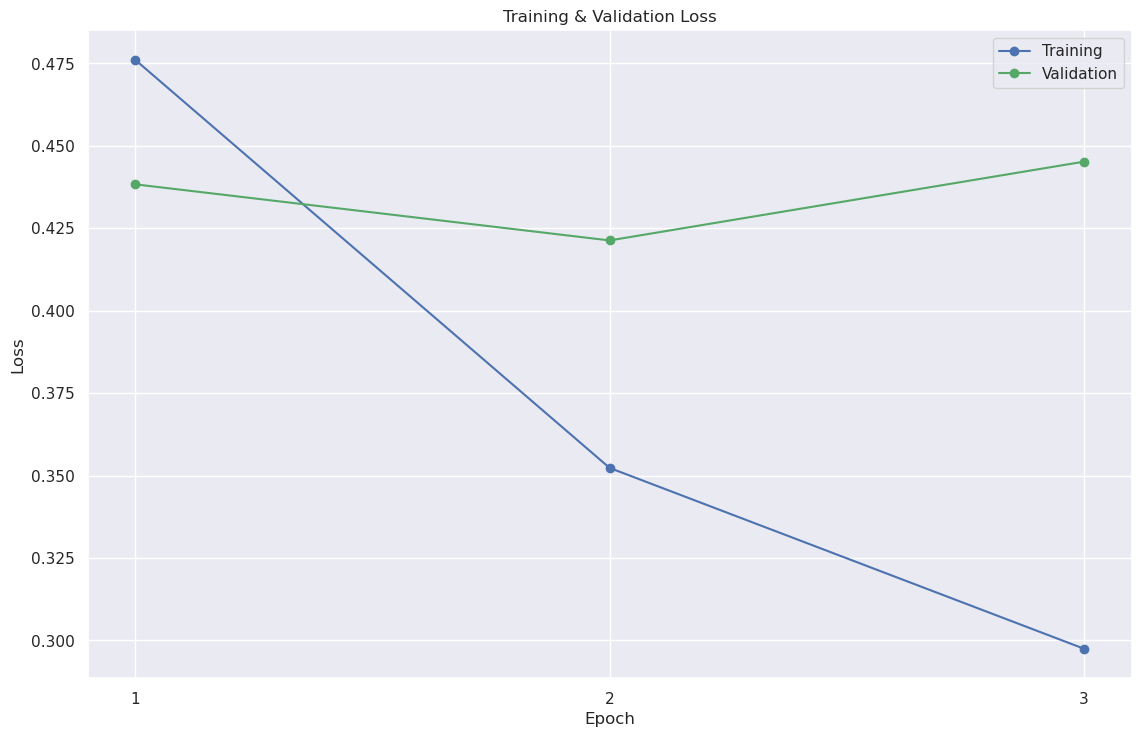

In [35]:
fig, axes = plt.subplots(figsize=(12,8))

# Tr·ª±c quan ƒë∆∞·ªùng cong m·∫•t m√°t tr√™n t·∫≠p train v√† validation

plt.plot(df_stats['Training Loss'], 'b-o', label='Training')
plt.plot(df_stats['Valid. Loss'], 'g-o', label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks([1, 2, 3])
plt.show()

In [36]:
# Ti·∫øn h√†nh d·ª± ƒëo√°n tr√™n t·∫≠p test

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

# ƒê·∫∑t m√¥ h√¨nh v√†o ch·∫ø ƒë·ªô ƒë√°nh gi√° (evaluation mode) b·∫±ng c√°ch g·ªçi `model.eval()`.

model.eval()

# Kh·ªüi t·∫°o m·ªôt danh s√°ch `predictions` ƒë·ªÉ l∆∞u tr·ªØ c√°c d·ª± ƒëo√°n.

predictions = []

# Ti·∫øn h√†nh d·ª± ƒëo√°n tr√™n t·ª´ng batch:

for batch in prediction_dataloader:
    
  # Chuy·ªÉn batch v√†o GPU

  batch = tuple(t.to(device) for t in batch)
  
  # Gi·∫£i n√©n c√°c ƒë·∫ßu v√†o t·ª´ dataloader:
    
  b_input_ids, b_input_mask, = batch
  
  # ƒê·∫∑t `torch.no_grad()` ƒë·ªÉ th√¥ng b√°o cho PyTorch kh√¥ng t√≠nh to√°n ho·∫∑c l∆∞u tr·ªØ gradients, nh·∫±m ti·∫øt ki·ªám b·ªô nh·ªõ v√† tƒÉng t·ªëc ƒë·ªô d·ª± ƒëo√°n.
  with torch.no_grad():
      # Th·ª±c hi·ªán Forward pass, t√≠nh to√°n d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh l∆∞u v√†o logits:
    
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Di chuy·ªÉn `logits` t·ª´ GPU v·ªÅ CPU v√† chuy·ªÉn th√†nh numpy array:
    
  logits = logits.detach().cpu().numpy()
 
  
  # L∆∞u tr·ªØ c√°c d·ª± ƒëo√°n v√†o danh s√°ch `predictions`:
    
  predictions.append(logits)


print('DONE.')

Predicting labels for 3,263 test sentences...
DONE.


In [37]:
# L·∫•y danh s√°ch c√°c d·ª± ƒëo√°n,sau ƒë√≥ ch·ªçn gi√° tr·ªã m·ª•c ti√™u b·∫±ng c√°ch s·ª≠ d·ª•ng np.argmax().
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [38]:
# L∆∞u c√°c k·∫øt qu·∫£ ƒë√£ d·ª± ƒëo√°n.

submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
submission['target'] = flat_predictions
submission.head(10)

id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1
5  12       1
6  21       0
7  22       0
8  27       0
9  29       0

In [39]:
# L∆∞u k·∫øt qu·∫£ v√†o file csv

submission.to_csv('submission.csv', index=False, header=True)

## References:
https://blog.vietnamlab.vn/gioi-thieu-bert-va-ung-dung-vao-bai-toan-phan-loai-van-ban/